## **Exploratory Data Analysis**

In [1]:
# Import the neccesssary libraries
import numpy as np
import pandas as pd

# For visualization
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier



In [2]:
## Import and Read file 
df = pd.read_csv("C:/Users/USER/Documents/Data Project/Online Fraud Detection/Online Payment Fraud Detection (1).csv")
df.head(5)

,hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


Data Dictionary:

- hour: represents a unit of time where 1 step equals 1 hour
- type_of_trans: type of online transaction
- amount_trans: the amount of the transaction
- customer_start_trans: customer starting the transaction
- old_balance: balance before the transaction
- new_balance: balance after the transaction
- recipient_desc: recipient of the transaction
- initial_bal_recipient: initial balance of the recipient before the transaction
- new_bal_recipient: the new balance of the recipient after the transaction
- is_fraud: fraud transaction

In [3]:
# info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   hour                   1048575 non-null  int64  
 1   type_of_trans          1048575 non-null  object 
 2   amount_trans           1048575 non-null  float64
 3   customer_start_trans   1048575 non-null  object 
 4   old_balance            1048575 non-null  float64
 5   new_balance            1048575 non-null  float64
 6   recipient_desc         1048575 non-null  object 
 7   initial_bal_recipient  1048575 non-null  float64
 8   new_bal_recipient      1048575 non-null  float64
 9   is_fraud               1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [4]:
# shape of the data
df.shape

(1048575, 10)

In [5]:
# Checkin for missing values
df.isnull().sum()

hour                     0
type_of_trans            0
amount_trans             0
customer_start_trans     0
old_balance              0
new_balance              0
recipient_desc           0
initial_bal_recipient    0
new_bal_recipient        0
is_fraud                 0
dtype: int64

In [6]:
# check columns
df.columns

Index(['hour', 'type_of_trans', 'amount_trans', 'customer_start_trans',
       'old_balance', 'new_balance', 'recipient_desc', 'initial_bal_recipient',
       'new_bal_recipient', 'is_fraud'],
      dtype='object')

In [7]:
# Check for data types
df.dtypes

hour                       int64
type_of_trans             object
amount_trans             float64
customer_start_trans      object
old_balance              float64
new_balance              float64
recipient_desc            object
initial_bal_recipient    float64
new_bal_recipient        float64
is_fraud                   int64
dtype: object

## Data Validation and prepocessing 

In [8]:
# select the categorical columns
cat_vars = df.select_dtypes(include = ['category', 'object']).columns.tolist()
print(cat_vars)

['type_of_trans', 'customer_start_trans', 'recipient_desc']


In [9]:
# loop through all the categorical column
for column in cat_vars:
    print(df[column].value_counts())

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type_of_trans, dtype: int64
C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: customer_start_trans, Length: 1048317, dtype: int64
C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: recipient_desc, Length: 449635, dtype: int64


In [10]:
# select the numerical columns
num_vars = df.select_dtypes(include = ['int64', 'float64']).columns.tolist()
print(num_vars)

['hour', 'amount_trans', 'old_balance', 'new_balance', 'initial_bal_recipient', 'new_bal_recipient', 'is_fraud']


In [11]:
# loop through all the categorical column
for column in num_vars:
    print(df[column].value_counts())

19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: hour, Length: 95, dtype: int64
10000000.00    14
706.25          6
1711.67         5
3172.71         5
5838.16         5
               ..
49696.49        1
49225.70        1
30666.99        1
328559.51       1
11450.03        1
Name: amount_trans, Length: 1009606, dtype: int64
0.00           342214
10100000.00       433
10300000.00       424
10200000.00       421
10900000.00       387
                ...  
295871.52           1
306220.00           1
133756.67           1
329511.00           1
80584.95            1
Name: old_balance, Length: 391033, dtype: int64
0.00           580275
10300000.00       450
10100000.00       449
10200000.00       435
10900000.00       405
                ...  
340001.65           1
272919.15           1
5034.69             1
17148.54            1
69134.92            1
Name: new_balance, Length: 440792, dtype: int64
0.0

In [12]:
# summary statistics of data
df.describe().astype('int64')

,hour,amount_trans,old_balance,new_balance,initial_bal_recipient,new_bal_recipient,is_fraud
count,1048575,1048575,1048575,1048575,1048575,1048575,1048575
mean,26,158666,874009,893808,978160,1114197,0
std,15,264940,2971750,3008271,2296780,2416593,0
min,1,0,0,0,0,0,0
25%,15,12149,0,0,0,0,0
50%,20,76343,16002,0,126377,218260,0
75%,39,213761,136642,174599,915923,1149807,0
max,95,10000000,38900000,38900000,42100000,42200000,1


In [13]:
# Define the columns to check for duplicates
columns = ['hour', 'type_of_trans', 'amount_trans', 'customer_start_trans',
           'old_balance', 'new_balance', 'recipient_desc', 'initial_bal_recipient',
           'new_bal_recipient', 'is_fraud']

# Find duplicate records based on the specified columns
duplicate_records = df[df.duplicated(subset=columns, keep=False)]

# Display the duplicate records
print(duplicate_records)


Empty DataFrame
Columns: [hour, type_of_trans, amount_trans, customer_start_trans, old_balance, new_balance, recipient_desc, initial_bal_recipient, new_bal_recipient, is_fraud]
Index: []


In [14]:
df.head()

,hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [15]:
# Function to categorize hours into morning, afternoon, and evening
def categorize_time(hour):
    if 1 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'

# Apply the function to create a new column 'time_of_day'
df['time_of_day'] = df['hour'].apply(categorize_time)

# Display the DataFrame
print(df)

         hour type_of_trans  amount_trans customer_start_trans  old_balance  \
0           1       PAYMENT       9839.64          C1231006815    170136.00   
1           1       PAYMENT       1864.28          C1666544295     21249.00   
2           1      TRANSFER        181.00          C1305486145       181.00   
3           1      CASH_OUT        181.00           C840083671       181.00   
4           1       PAYMENT      11668.14          C2048537720     41554.00   
...       ...           ...           ...                  ...          ...   
1048570    95      CASH_OUT     132557.35          C1179511630    479803.00   
1048571    95       PAYMENT       9917.36          C1956161225     90545.00   
1048572    95       PAYMENT      14140.05          C2037964975     20545.00   
1048573    95       PAYMENT      10020.05          C1633237354     90605.00   
1048574    95       PAYMENT      11450.03          C1264356443     80584.95   

         new_balance recipient_desc  initial_bal_re

In [16]:
df.head()

,hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud,time_of_day
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Morning
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Morning
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Morning
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Morning
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Morning


## Exploratory Data Analysis

Univariate Analysis
- We will consider the each of the features and its visualization to check the distributions

In [17]:
# Calculate summary statistics
df['amount_trans'].describe(percentiles=[.25, .5, .75])

count    1.048575e+06
mean     1.586670e+05
std      2.649409e+05
min      1.000000e-01
25%      1.214907e+04
50%      7.634333e+04
75%      2.137619e+05
max      1.000000e+07
Name: amount_trans, dtype: float64

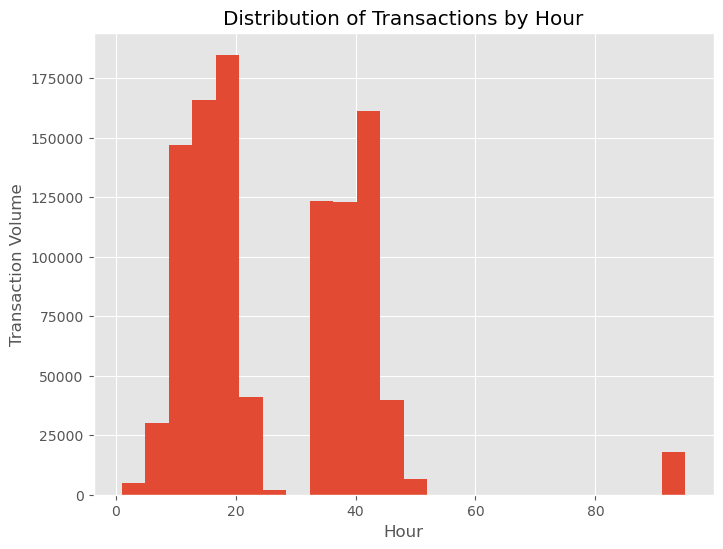

In [18]:
# Plot a histogram of transaction volume by hour
plt.figure(figsize=(8, 6))
plt.hist(df['hour'], bins=24)
plt.title("Distribution of Transactions by Hour")
plt.xlabel("Hour")
plt.ylabel("Transaction Volume")
plt.show()

Evening      657023
Afternoon    245594
Morning      145958
Name: time_of_day, dtype: int64


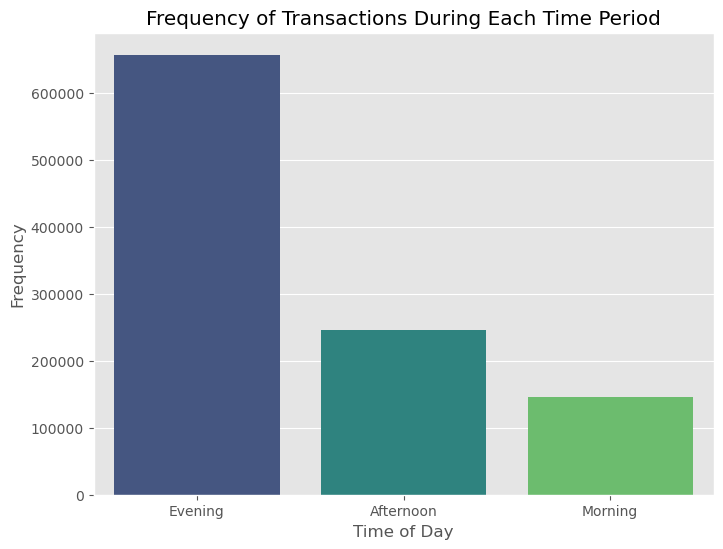

In [19]:
# Count the frequency of transactions during each time period
time_of_day_counts = df['time_of_day'].value_counts()

# Display the frequency counts
print(time_of_day_counts)
# Plotting the frequencies
plt.figure(figsize=(8, 6))
sns.barplot(x=time_of_day_counts.index, y=time_of_day_counts.values, palette='viridis')
plt.title('Frequency of Transactions During Each Time Period')
plt.xlabel('Time of Day')
plt.ylabel('Frequency')
plt.show()


In [20]:
# number of unique customers initiating transactions
df['customer_start_trans'].nunique()


1048317

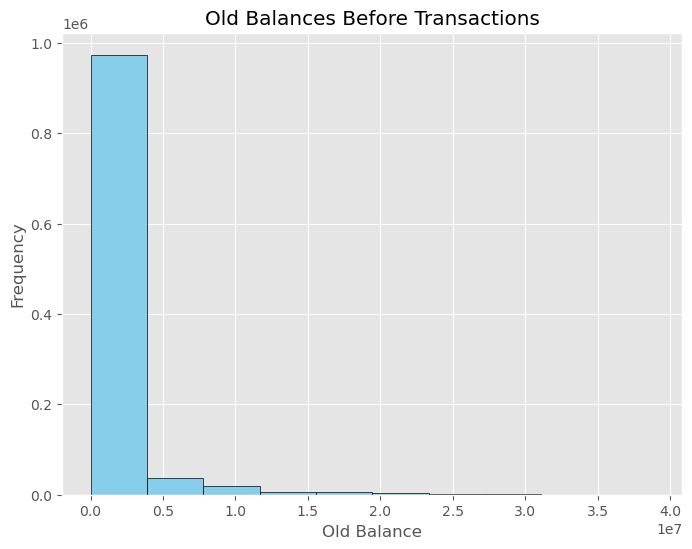

In [21]:
# Plotting the histogram of old balances
plt.figure(figsize=(8, 6))
plt.hist(df['old_balance'], bins=10, color='skyblue', edgecolor='black')
plt.title('Old Balances Before Transactions')
plt.xlabel('Old Balance')
plt.ylabel('Frequency')
plt.show()

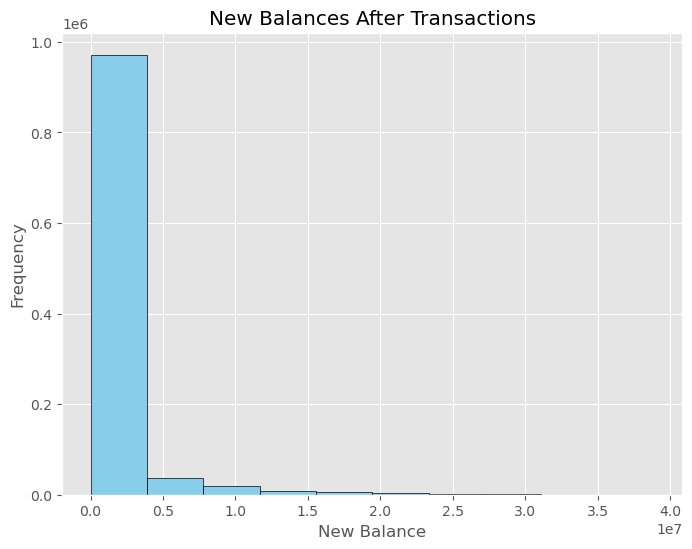

In [22]:
# Plotting the histogram of new balances
plt.figure(figsize=(8, 6))
plt.hist(df['new_balance'], bins=10, color='skyblue', edgecolor='black')
plt.title('New Balances After Transactions')
plt.xlabel('New Balance')
plt.ylabel('Frequency')
plt.show()

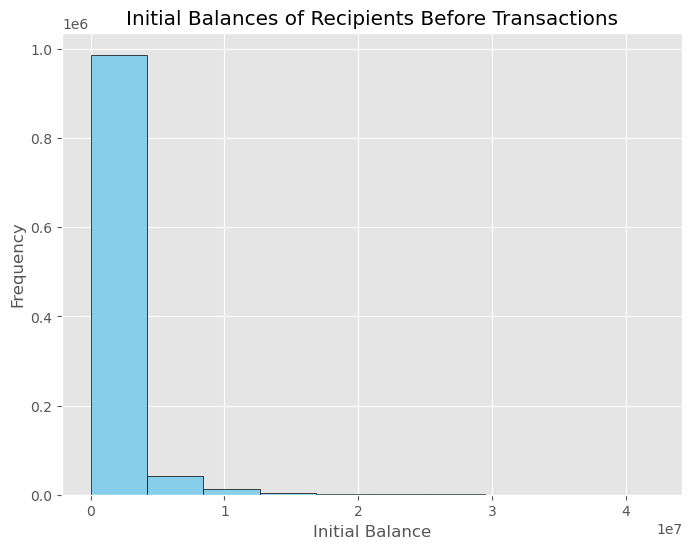

In [23]:
# Plotting the histogram of initial balances
plt.figure(figsize=(8, 6))
plt.hist(df['initial_bal_recipient'], bins=10, color='skyblue', edgecolor='black')
plt.title('Initial Balances of Recipients Before Transactions')
plt.xlabel('Initial Balance')
plt.ylabel('Frequency')
plt.show()

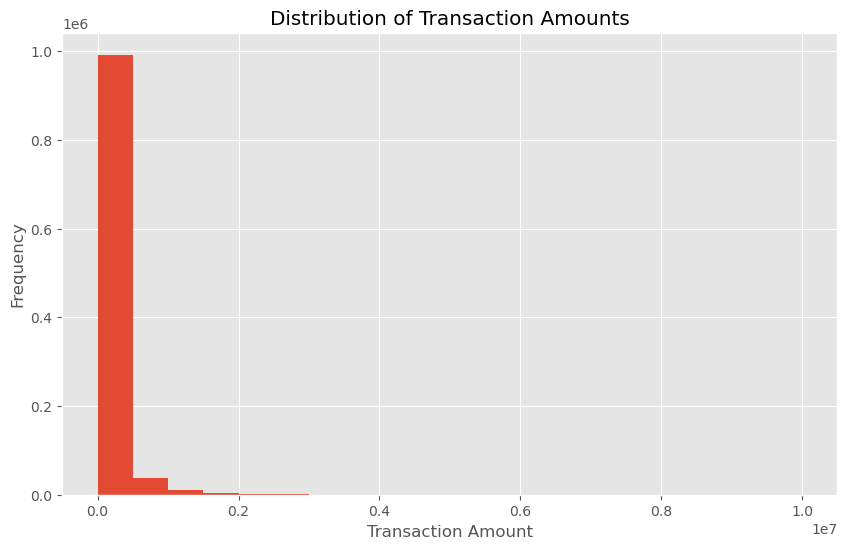

In [24]:
# histogram of transaction amounts
plt.figure(figsize=(10, 6))
plt.hist(df['amount_trans'], bins=20)
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts')
plt.show()

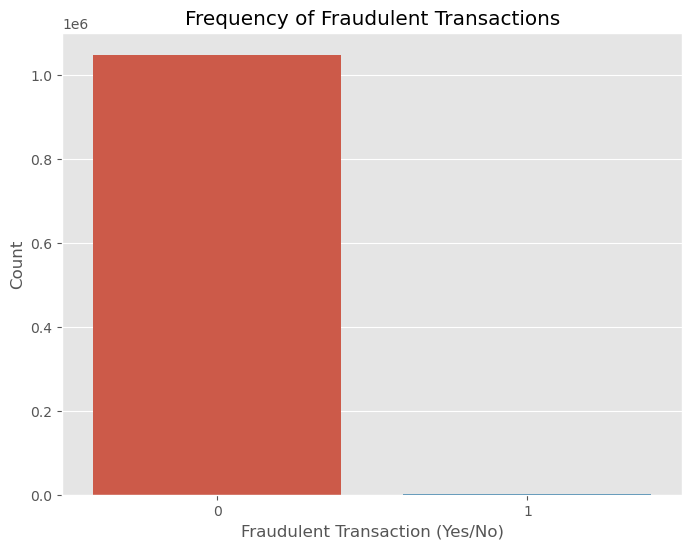

In [25]:
# Plot a count plot of fraudulent transactions
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_fraud')
plt.title("Frequency of Fraudulent Transactions")
plt.xlabel("Fraudulent Transaction (Yes/No)")
plt.ylabel("Count")
plt.show()

In [26]:
# Count the number of transactions in 'amount_trans'
transaction_count = df['amount_trans'].count()

print("Number of transactions in 'amount_trans':", transaction_count)

Number of transactions in 'amount_trans': 1048575


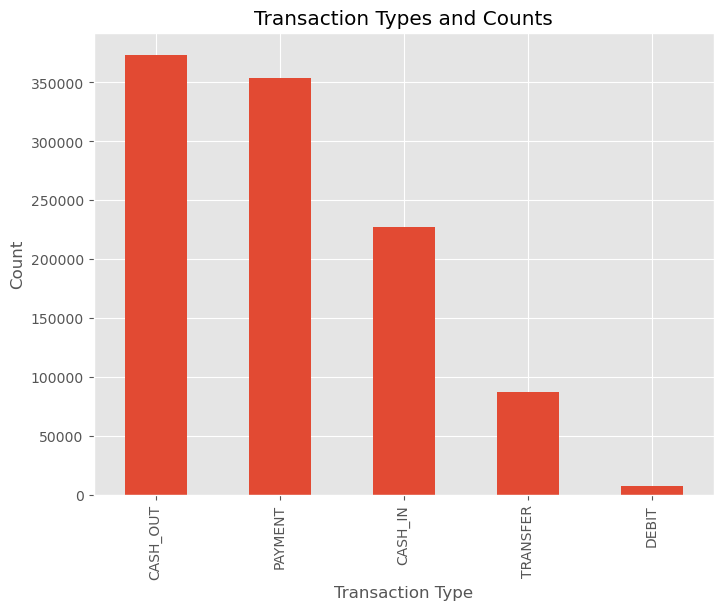

The most common type of transaction is: CASH_OUT


In [27]:
# Count the occurrences of each transaction type
transaction_counts = df['type_of_trans'].value_counts()

# Sort the transaction types in descending order
transaction_counts_sorted = transaction_counts.sort_values(ascending=False)

# Plot the transaction counts
plt.figure(figsize=(8, 6))
transaction_counts_sorted.plot(kind='bar')
plt.title("Transaction Types and Counts")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

# Print the most common transaction type
most_common_transaction = transaction_counts_sorted.index[0]
print("The most common type of transaction is:", most_common_transaction)

# **Bivariates Analysis**

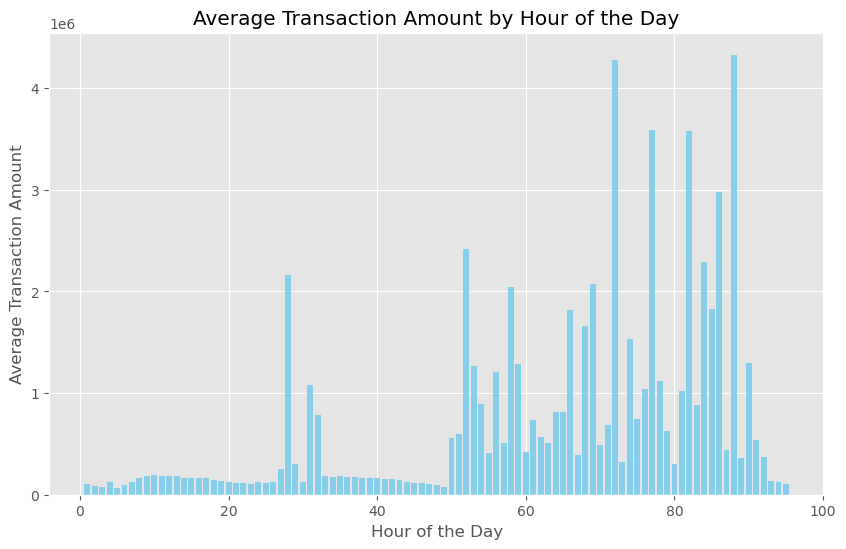

In [28]:
# Group by hour and calculate the average transaction amount
hourly_avg_amount = df.groupby('hour')['amount_trans'].mean().reset_index()

# Plotting the results
plt.figure(figsize=(10, 6))
plt.bar(hourly_avg_amount['hour'], hourly_avg_amount['amount_trans'], color='skyblue')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Transaction Amount')
plt.title('Average Transaction Amount by Hour of the Day')
plt.show()

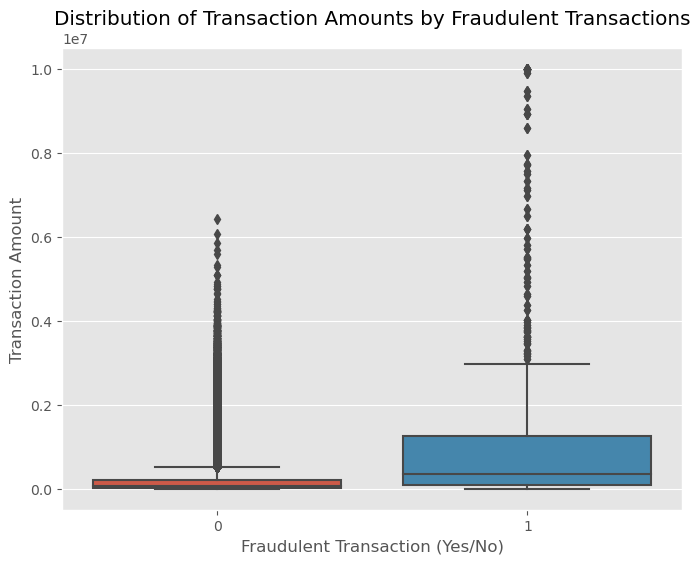

In [29]:
# Plot a box plot of transaction amounts for fraudulent and non-fraudulent transactions
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='is_fraud', y='amount_trans')
plt.title("Distribution of Transaction Amounts by Fraudulent Transactions")
plt.xlabel("Fraudulent Transaction (Yes/No)")
plt.ylabel("Transaction Amount")
plt.show()

 Examine the relationship between the initial balance before a transaction and the likelihood of fraud

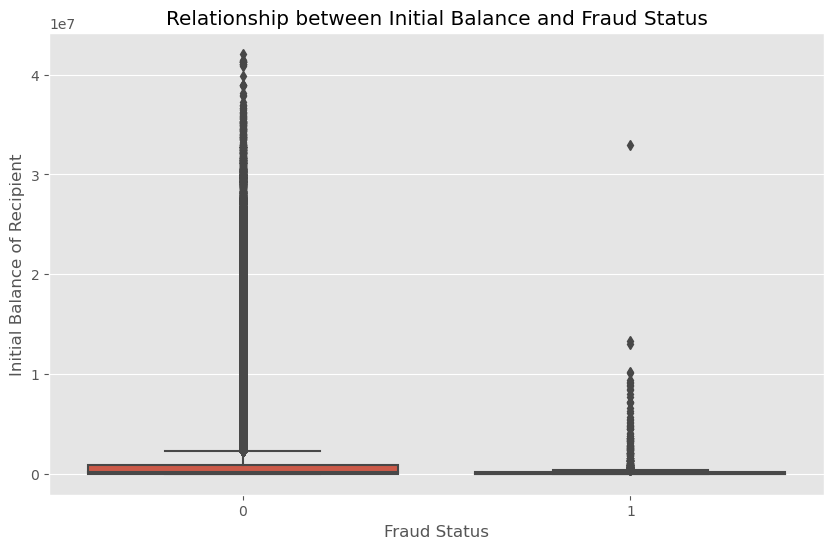

T-test results - T-statistic: -7.733298226152371, P-value: 1.0488777441099548e-14


In [30]:
# Boxplot to visualize the relationship
plt.figure(figsize=(10, 6))
sns.boxplot(x='is_fraud', y='initial_bal_recipient', data=df)
plt.title('Relationship between Initial Balance and Fraud Status')
plt.xlabel('Fraud Status')
plt.ylabel('Initial Balance of Recipient')
plt.show()

# t-test to check statistical significance
from scipy.stats import ttest_ind

fraud_initial_balance = df[df['is_fraud'] == 1]['initial_bal_recipient']
non_fraud_initial_balance = df[df['is_fraud'] == 0]['initial_bal_recipient']

t_stat, p_value = ttest_ind(fraud_initial_balance, non_fraud_initial_balance)

print(f'T-test results - T-statistic: {t_stat}, P-value: {p_value}')

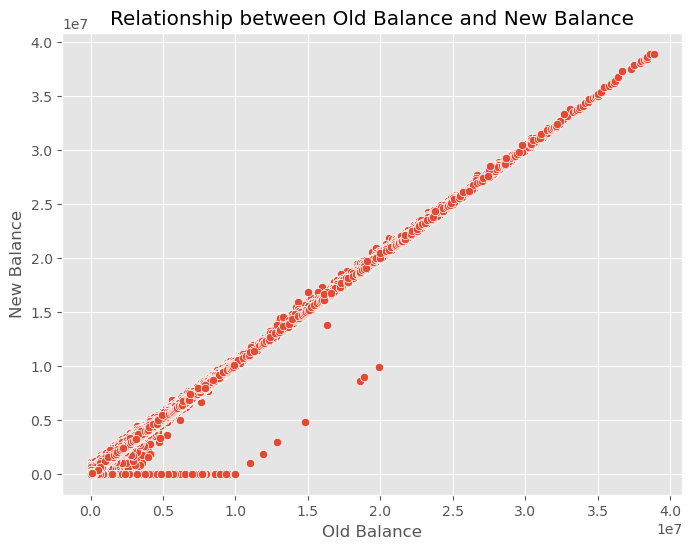

In [31]:
# Plot a scatter plot of old balance vs new balance
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='old_balance', y='new_balance')
plt.title("Relationship between Old Balance and New Balance")
plt.xlabel("Old Balance")
plt.ylabel("New Balance")
plt.show()

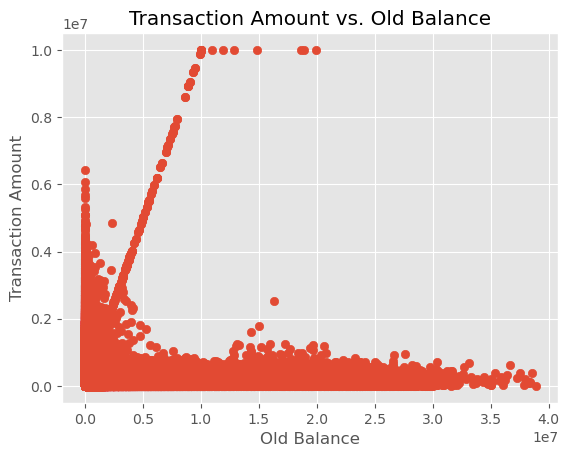

In [32]:
# scatter plot of amount_trans against old_balance
plt.scatter(df['old_balance'], df['amount_trans'])

# add labels and title
plt.xlabel('Old Balance')
plt.ylabel('Transaction Amount')
plt.title('Transaction Amount vs. Old Balance')

# show the plot
plt.show()

In [33]:
# crosstab table of type_of_trans and is_fraud
table = pd.crosstab(df['type_of_trans'], df['is_fraud'])

# add a total column to the table
table['Total'] = table.sum(axis=1)

# add a total row to the table
table.loc['Total'] = table.sum(axis=0)

# display the table
print(table)


is_fraud             0     1    Total
type_of_trans                        
CASH_IN         227130     0   227130
CASH_OUT        373063   578   373641
DEBIT             7178     0     7178
PAYMENT         353873     0   353873
TRANSFER         86189   564    86753
Total          1047433  1142  1048575


This table shows the frequency of each type of transaction across whether the transaction is fraudulent or not. The rows represent the different types of transactions, while the columns represent the fraud status (0 for non-fraudulent and 1 for fraudulent). The last column represents the total number of transactions for each type.

For example, we can see that there were 227,130 cash-in transactions, all of which were non-fraudulent. On the other hand, there were 578 fraudulent cash-out transactions out of a total of 373,641 cash-out transactions.

The last row of the table shows the total number of transactions for each fraud status. For instance, there were 1,042,433 non-fraudulent transactions and 1,142 fraudulent transactions, out of a total of 1,048,575 transactions.

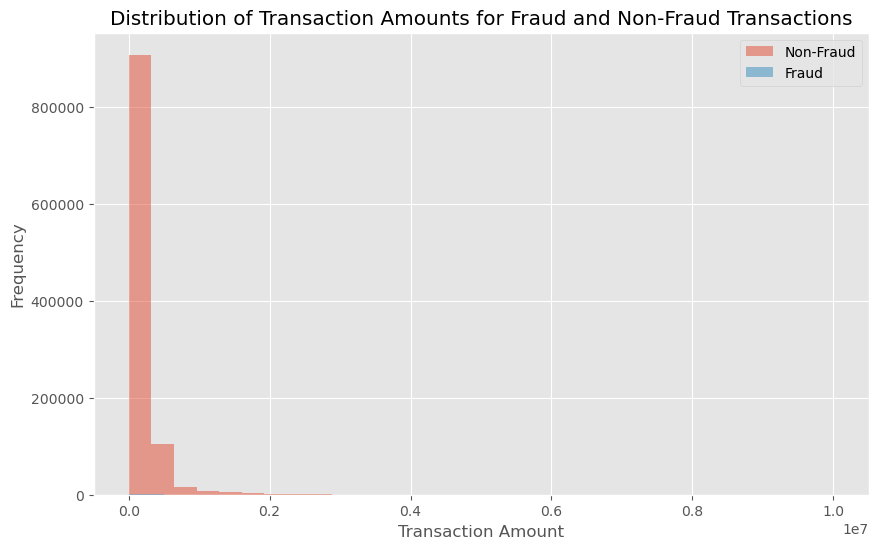

In [35]:
# Separate data into fraud and non-fraud transactions
fraud_data = df[df['is_fraud'] == 1]
non_fraud_data = df[df['is_fraud'] == 0]

# Plot histograms
plt.figure(figsize=(10, 6))

plt.hist(non_fraud_data['amount_trans'], bins=20, alpha=0.5, label='Non-Fraud')
plt.hist(fraud_data['amount_trans'], bins=20, alpha=0.5, label='Fraud')

plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.title('Distribution of Transaction Amounts for Fraud and Non-Fraud Transactions')
plt.legend()
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


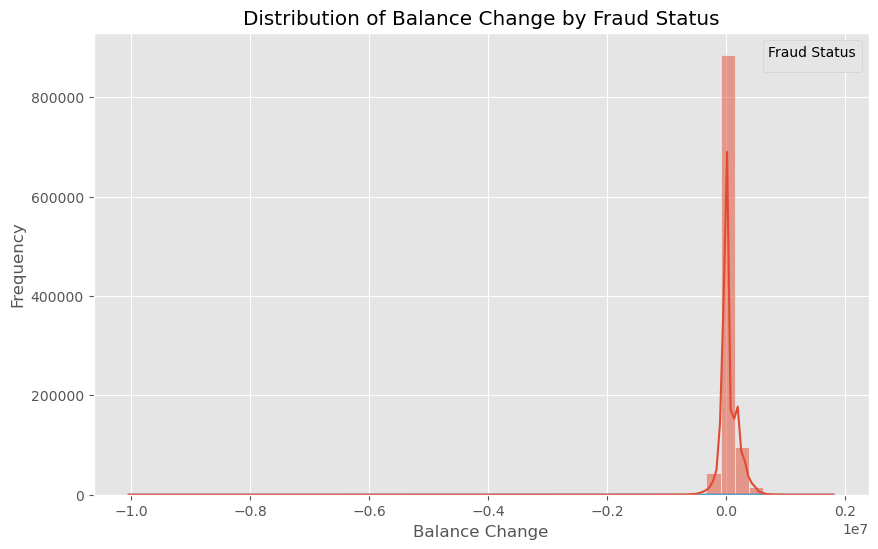

In [36]:
# Create a new column for the balance change
df['balance_change'] = df['new_balance'] - df['old_balance']

# Visualize the distribution of balance change for fraud and non-fraud transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='balance_change', hue='is_fraud', bins=50, kde=True)
plt.title('Distribution of Balance Change by Fraud Status')
plt.xlabel('Balance Change')
plt.ylabel('Frequency')
plt.legend(title='Fraud Status')
plt.show()


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


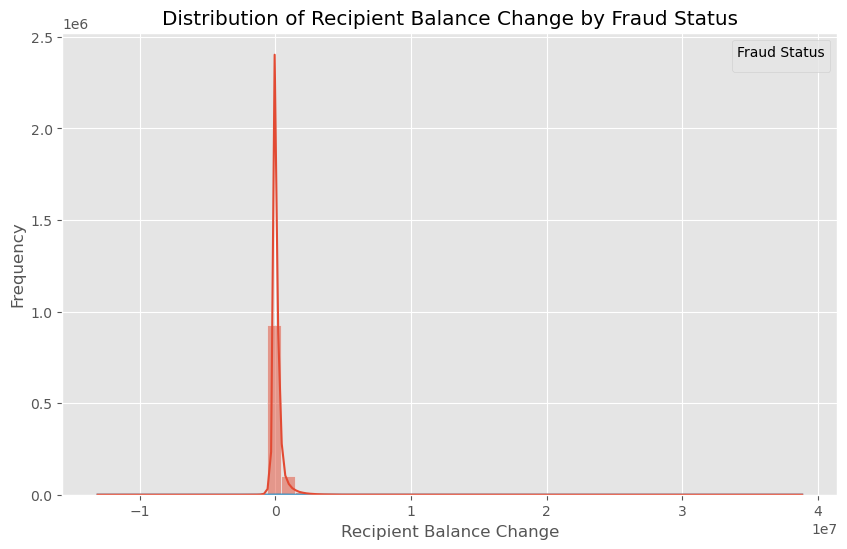

In [37]:
# Create a new column for the recipient balance change
df['recipient_balance_change'] = df['new_bal_recipient'] - df['initial_bal_recipient']

# Visualize the distribution of recipient balance change for fraud and non-fraud transactions
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='recipient_balance_change', hue='is_fraud', bins=50, kde=True)
plt.title('Distribution of Recipient Balance Change by Fraud Status')
plt.xlabel('Recipient Balance Change')
plt.ylabel('Frequency')
plt.legend(title='Fraud Status')
plt.show()


<Figure size 1000x600 with 0 Axes>

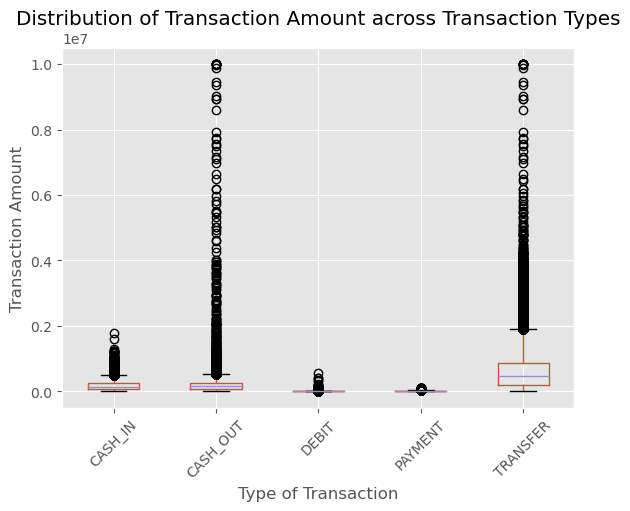

In [38]:
# create a box plot of amount_trans grouped by type_of_trans
plt.figure(figsize=(10, 6))
df.boxplot(column='amount_trans', by='type_of_trans')
plt.xlabel('Type of Transaction')
plt.ylabel('Transaction Amount')
plt.title('Distribution of Transaction Amount across Transaction Types')
plt.suptitle('')
plt.xticks(rotation=45)
plt.show()


In [46]:
df.head(5)

,hour,type_of_trans,amount_trans,customer_start_trans,old_balance,new_balance,recipient_desc,initial_bal_recipient,new_bal_recipient,is_fraud,time_of_day,balance_change,recipient_balance_change
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,Morning,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,Morning,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,Morning,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,Morning,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,Morning,-11668.14,0.0


# **Multivariates Analysis**

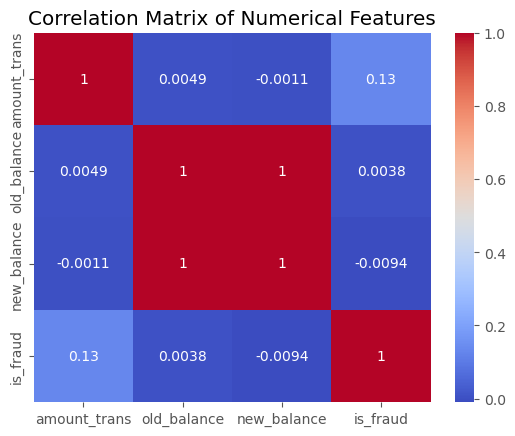

In [39]:
# Select the numerical columns for correlation analysis
numerical_columns = ['amount_trans', 'old_balance', 'new_balance', 'is_fraud']

# Compute correlation coefficients
corr_matrix = df[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_24856\1275831390.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df.groupby('is_fraud').mean()


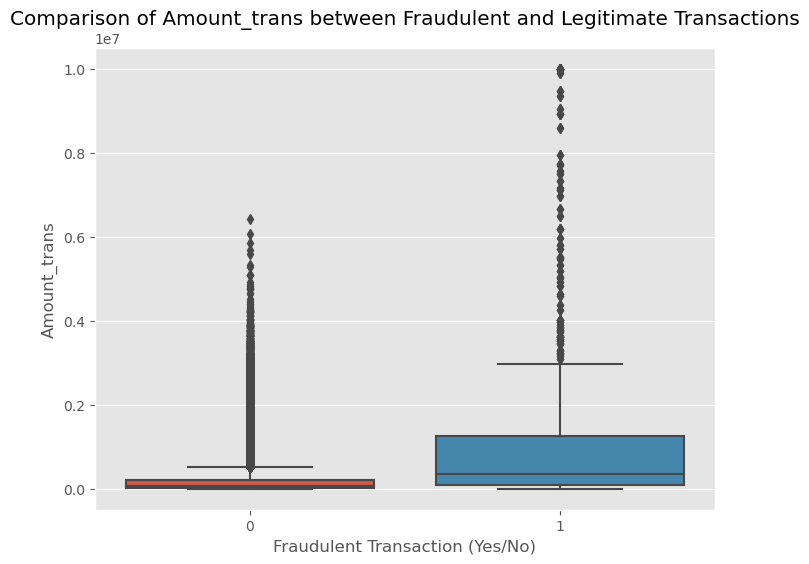

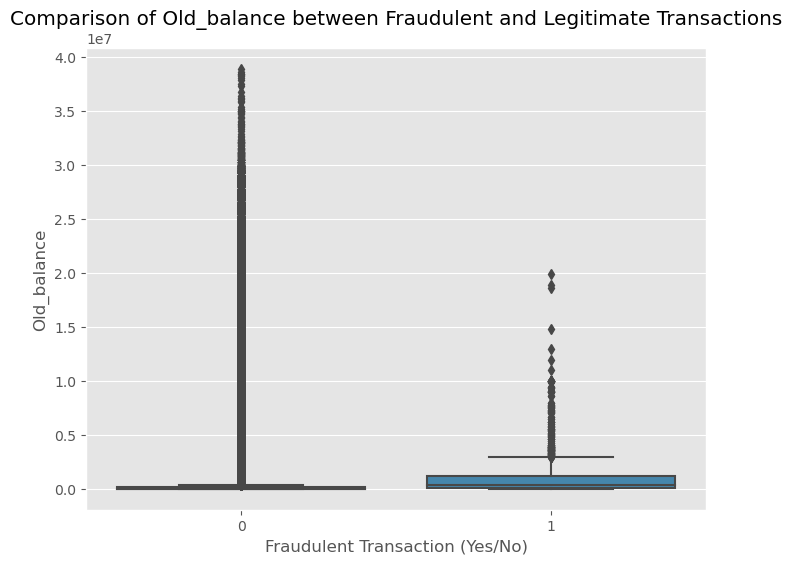

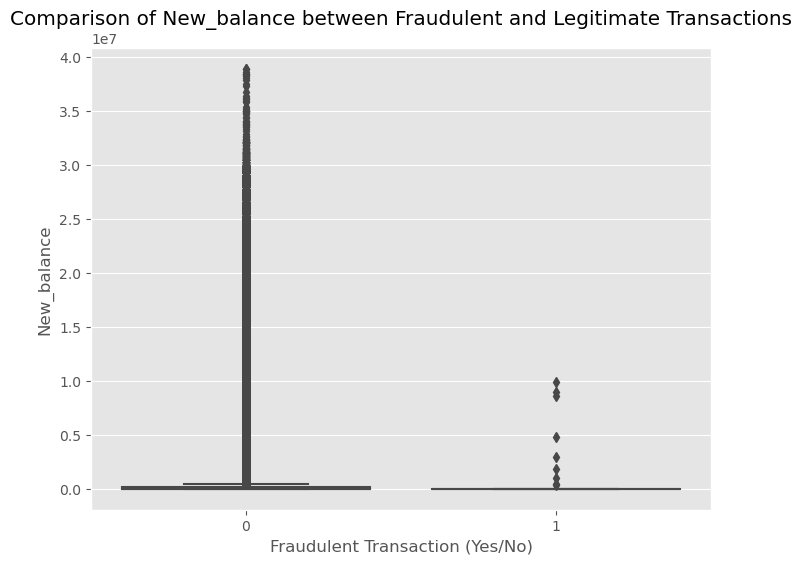

In [40]:
# Compute the mean values of numerical features by fraud status
mean_df = df.groupby('is_fraud').mean()

# Identify the key features most indicative of fraud
key_features = ['amount_trans', 'old_balance', 'new_balance']

# Create visualizations to compare key features between fraudulent and legitimate transactions
for feature in key_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df, x='is_fraud', y=feature)
    plt.title("Comparison of " + feature.capitalize() + " between Fraudulent and Legitimate Transactions")
    plt.xlabel("Fraudulent Transaction (Yes/No)")
    plt.ylabel(feature.capitalize())
    plt.show()


**The relationship between two sets of variables.**

Percentage of Fraudulent Transactions: 0.10890971079798775


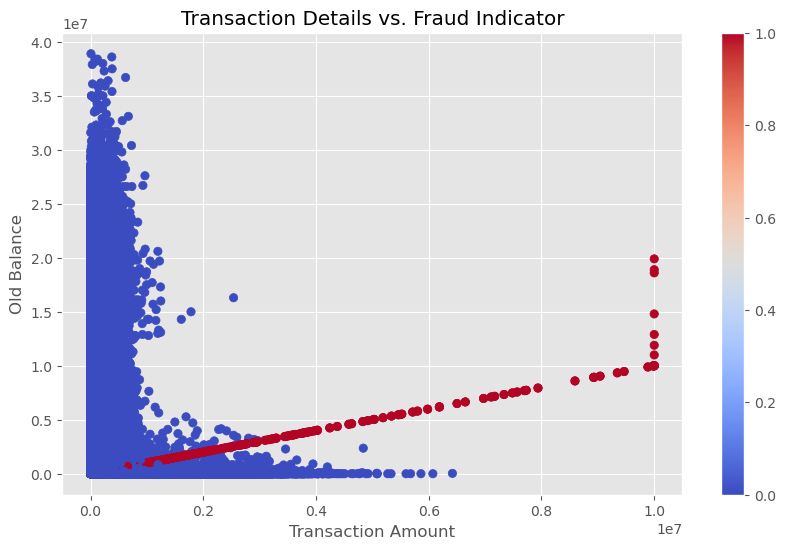

In [41]:
# select the transaction details and the fraud indicator
variables = ['amount_trans', 'old_balance', 'is_fraud']

# subset the data
df_subset = df[variables]

# calculate the percentage of fraudulent transactions
fraud_percentage = df_subset['is_fraud'].mean() * 100
print("Percentage of Fraudulent Transactions:", fraud_percentage)

# create a scatter plot of transaction details vs. fraud indicator
plt.figure(figsize=(10, 6))
plt.scatter(df_subset['amount_trans'], df_subset['old_balance'], c=df_subset['is_fraud'], cmap='coolwarm')
plt.xlabel('Transaction Amount')
plt.ylabel('Old Balance')
plt.title('Transaction Details vs. Fraud Indicator')
plt.colorbar()
plt.show()


**Model Training**


Logistic Regression

In [42]:
# select the features and target variable
features = ['amount_trans', 'old_balance', 'new_balance']
target = 'is_fraud'

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# logistic regression model
model = LogisticRegression()

# fit the model on the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.85      0.37      0.52       224

    accuracy                           1.00    209715
   macro avg       0.92      0.69      0.76    209715
weighted avg       1.00      1.00      1.00    209715



Decision_Tree_Classifier

In [43]:
# select the features and target variable
features = ['amount_trans', 'old_balance', 'new_balance']
target = 'is_fraud'

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# decision tree model
model = DecisionTreeClassifier()

# fit the model on the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.84      0.85      0.85       224

    accuracy                           1.00    209715
   macro avg       0.92      0.92      0.92    209715
weighted avg       1.00      1.00      1.00    209715



In [44]:
# select the features and target variable
features = ['amount_trans', 'old_balance', 'new_balance']
target = 'is_fraud'

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Random Forest model
model = RandomForestClassifier()

# fit the model on the training data
model.fit(X_train, y_train)

# make predictions on the testing data
y_pred = model.predict(X_test)

# print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.85      0.81      0.83       224

    accuracy                           1.00    209715
   macro avg       0.92      0.91      0.91    209715
weighted avg       1.00      1.00      1.00    209715



In [45]:
# Create an empty dictionary to store the AUC-ROC scores
auc_roc_scores = {'Model': [], 'AUC-ROC Score': []}

# Models to evaluate
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# select the features and target variable
features = ['amount_trans', 'old_balance', 'new_balance']
target = 'is_fraud'

# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.2, random_state=42)

# Iterate through the models and calculate the AUC-ROC scores
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    auc_roc = roc_auc_score(y_test, y_pred_prob)
    auc_roc_scores['Model'].append(model_name)
    auc_roc_scores['AUC-ROC Score'].append(auc_roc)

# Create a dataframe from the AUC-ROC scores dictionary
auc_roc_scores_df = pd.DataFrame(auc_roc_scores)

# Display the AUC-ROC scores dataframe
print(auc_roc_scores_df)


                 Model  AUC-ROC Score
0  Logistic Regression       0.975689
1        Random Forest       0.968542
2        Decision Tree       0.928466
